# 折れ線グラフ（2変数）

## 概要

連続的に変化する変数が複数ある場合でも**折れ線グラフ**を利用することは可能です．
縦軸・横軸に変数の値を取り，サンプル付近に時点情報を付加することで，2変数の連続的な変化を表現します．

![connected](../figs/charts/connected.png)

例えば上図は，四大少年誌の5年ごとの作家数（横軸）と作品数（縦軸）の推移を表した折れ線グラフです．

## Plotlyによる作図方法

[折れ線グラフ（一変数）](https://kakeami.github.io/viz-madb/charts4assocs/line.html)と同様に，`plotly.express.line()`で折れ線グラフを作図できます．

```python
import plotly.express as px
# 事前にcol_text（例：日付や時刻）で昇順ソート
df = df.sort_values('col_text', ignore_index=True)
fig = px.line(
    df, x='col_x', y='col_y', text='col_text')
```

上記の例は，`df`の`col_x`列を横軸，`col_y`列を縦軸に取り，`col_text`（多くの場合，日付や時刻）を付記した折れ線グラフのオブジェクト`fig`を作成します．
時系列順に直線を引けるように，事前に`col_text`でソートする必要があることにご注意ください．

## MADB Labを用いた作図例

### 下準備

In [3]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [5]:
UNIT_YEARS = 5
YEARS_TO_DROP = ['1970', '2015']

In [6]:
def add_years_to_df(df, unit_years=10):
    """unit_years単位で区切ったyears列を追加"""
    df_new = df.copy()
    df_new['years'] = \
        pd.to_datetime(df['datePublished']).dt.year \
        // unit_years * unit_years
    df_new['years'] = df_new['years'].astype(str)
    return df_new

In [7]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    # 凡例でグラフが潰れないよう調整
    fig.update_layout(legend={
        'yanchor': 'top',
        'xanchor': 'left',
        'x': 0.01, 'y': 0.99})
    fig.show(renderer=RENDERER)

In [8]:
df = pd.read_csv(PATH_DATA)

### 作品数と作家数の推移

In [9]:
df = add_years_to_df(df, UNIT_YEARS)
df_plot = \
    df.groupby('years')['cname', 'creator'].nunique().reset_index()
# 最初と最後の年度は不十分なデータなので除外
df_plot = \
    df_plot[~df_plot['years'].isin(YEARS_TO_DROP)]\
    .reset_index(drop=True)

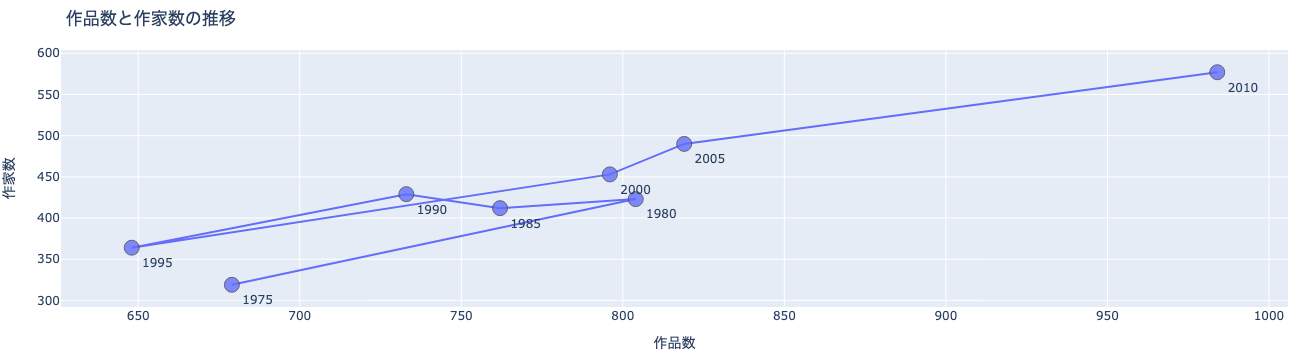

In [11]:
fig = px.line(
    df_plot, x='cname', y='creator', text='years',
    labels={'cname': '作品数', 'creator': '作家数'},
    title='作品数と作家数の推移')
fig.update_traces(
    marker={'size': 15, 'line_width':1, 'opacity':0.8},
    textposition='bottom right')
show_fig(fig)

作品数と作家数の推移がわかります．
基本的に作品数・作家数は増加傾向にあるようですが，1985年から1995年は一時的に減少していたことがわかります．

### 雑誌別の作品数と作家数の推移

次に，雑誌別に同様の集計をしてみましょう．

In [12]:
df = add_years_to_df(df, 5)
df_plot = \
    df.groupby(['mcname', 'years'])['cname', 'creator']\
    .nunique().reset_index()
# 最初と最後の年度は不十分なデータなので除外
df_plot = \
    df_plot[~df_plot['years'].isin(YEARS_TO_DROP)]\
    .reset_index(drop=True)

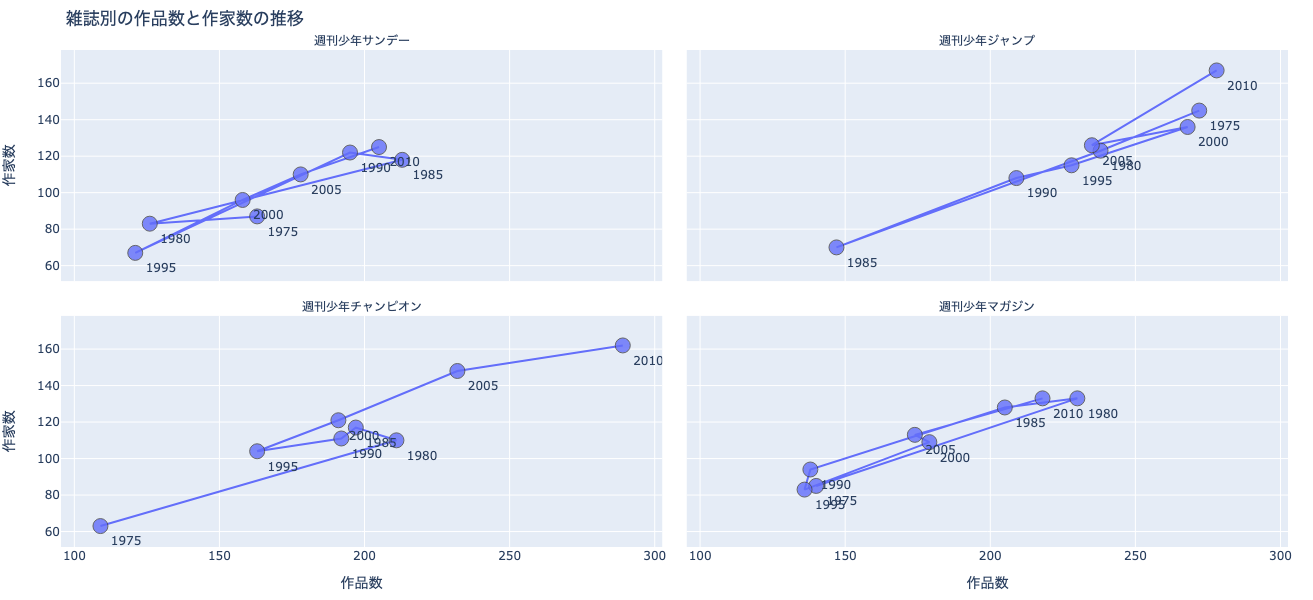

In [13]:
fig = px.line(
    df_plot, x='cname', y='creator', text='years',
    facet_col='mcname', facet_col_wrap=2,
    labels={'cname': '作品数', 'creator': '作家数'},
    height=600, title='雑誌別の作品数と作家数の推移')
fig.update_traces(
    marker={'size': 15, 'line_width':1, 'opacity':0.8},
    textposition='bottom right')
fig.for_each_annotation(
    lambda a: a.update(text=a.text.split("=")[-1]))
show_fig(fig)

特に`週刊少年チャンピオン`に増加傾向がありそうに見えます．